In [1]:
import pandas as pdi
import datetime as dt
from scipy.stats import itemfreq

import numpy as np

In [2]:
from sklearn import metrics
from sklearn.cluster import KMeans,MiniBatchKMeans

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [4]:
data= pd.read_excel("data.xlsx",sep='|')

In [5]:
data.head(3)

,Index,Parent,TcId,Name,FunctionalArea,Version,Type,Status,Objective,Procedure,...,test_team_qgroup,Test_test,testability,Tester,timeout,units,use_for_average,use_for_kpi,Objective1,Obj
1,1,NaN,Rumi Load Build FBC,Rumi Load Build FBC,---BuildLoadRumi_FBC (id: 158271),1.0,Normal,Active,NaN,,...,NaN,NaN,NaN,NaN,7200.0,NaN,NaN,NaN,,NaN
2,2,NaN,Baseport_binderipc_1,Binder IPC,---Baseport-stress (id: 29068),1.0,Iteration,Active,perform IPC operation on specified core,binderInts 1 18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,perform IPC operation on specified core,perform IPC operation specified core
4,4,NaN,Baseport_coremark_1,Coremark,---Baseport-stress (id: 29068),1.0,Normal,Active,From StressTestFramework,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,From StressTestFramework,From StressTestFramework


In [6]:
data=data[data['Objective'].notnull()]


In [7]:
data=data[data.Status!='Inactive']

In [8]:
data=data.dropna(axis=0, how='all')

In [9]:
data['Objective'].shape

(623,)

In [10]:
#data['Objective1']=data['Objective'].apply(lambda x : x.replace('_',' '))

In [11]:
#print(data['Name1'])

In [12]:
data['Objective'].shape

(623,)

In [13]:
data.shape

(623, 60)

In [14]:
NullValuesInDescription =sum(pd.isnull(data['Objective']))
print(NullValuesInDescription)

0


In [15]:
import nltk
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [16]:
#list=['affects', 'affined','affinity','affinity_notchanged', 'aggregation','aggressive', 'alarm','alarms','alignment', 'all_ssr', 'allocation','android', 'anti','antutu','api','apk','app','application', 'apps', 'apt']

In [17]:
"""
new_text = 'app apps alarm alrms affined affinity'
words = nltk.word_tokenize(new_text)
final = [[ps.stem(token) for token in sentence.split(" ")] for sentence in list]
for w in words:
    print(ps.stem(w))"""

'\nnew_text = \'app apps alarm alrms affined affinity\'\nwords = nltk.word_tokenize(new_text)\nfinal = [[ps.stem(token) for token in sentence.split(" ")] for sentence in list]\nfor w in words:\n    print(ps.stem(w))'

#### remove punctuations !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~

In [17]:
import string
table = str.maketrans(' ', ' ', string.punctuation)
#table= str.maketrans(string.punctuation, ' '*len(string.punctuation))
data['Obj'] = [w.translate(table) for w in data['Objective']]
    

In [18]:
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [19]:
data['Obj'] =[' '.join(s for s in words.split() if not (any(c.isdigit() for c in s) or (len(s)<3))) for words in data['Obj'] ]

In [20]:
doc=data['Obj'].values

In [21]:
len(doc)

712

In [22]:
#data['Obj']

In [23]:
doc

array(['perform IPC operation specified core', 'From StressTestFramework',
       'perform hotplug for all available cpus',
       'Hogs CPU ensure there are crashes', 'performs CPUDMA cyclic Test',
       'run benchmark stress mode catch crashes specific kernel',
       'From StressTestFramework', 'run file monkey hotplug mode',
       'From StressTestFramework',
       'Creates two buffers bufsize bytes fills them with random values copies randomsized regions between them and compares the result This useful for generating general dcache and pressure',
       'This generalpurpose kernel stress utility that found online',
       'Test Suspend Resume',
       'SysBench modular crossplatform and multithreaded benchmark tool for evaluating',
       'run LDREX Test',
       'Make sure that CONFIGMSMMPMOF enabled otherwise ensure that irq failures are seen you any messages like msmsmdprobe enableirqwake failed then report the failure',
       'check cpu freq available cores',
       'Run ad

In [24]:
#writer=pd.ExcelWriter('data1.xlsx')
#data.to_excel(writer,'Sheet1')
#writer.save()

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.porter import PorterStemmer
#from stemming.porter2 import stem

token_dict = {}
stemmer = PorterStemmer()


def stem_tokens(tokens, stemmer):
    stemmed = []
    for item in tokens:
        stemmed.append(stemmer.stem(item))
        #stemmed.append(stem(item))    
    return stemmed

def tokenize(text):
    tokens = nltk.word_tokenize(text)
    stems = stem_tokens(tokens, stemmer)
    return stems

        
tfidf = TfidfVectorizer(norm='l1',analyzer='word',tokenizer = tokenize,stop_words='english')
tfs = tfidf.fit_transform(doc)

In [26]:
len(tfidf.get_feature_names())

1011

In [27]:
print(tfs[:1])

  (0, 635)	0.144699499471
  (0, 445)	0.251354341228
  (0, 598)	0.236533157209
  (0, 836)	0.211196175779
  (0, 167)	0.156216826313


In [28]:
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

In [29]:
#print(tfidf.get_feature_names())

In [30]:
#tfidf.get_feature_names()

In [31]:
len(tfidf.vocabulary_)

1011

In [32]:
print(tfs[0])

  (0, 635)	0.144699499471
  (0, 445)	0.251354341228
  (0, 598)	0.236533157209
  (0, 836)	0.211196175779
  (0, 167)	0.156216826313


In [33]:
doc[:3]

array(['perform IPC operation specified core', 'From StressTestFramework',
       'perform hotplug for all available cpus'], dtype=object)

In [34]:
data = tfs.toarray()

In [35]:
reduced_data = PCA(n_components=100).fit_transform(data)

In [36]:
r_Data=TruncatedSVD(n_components=100).fit_transform(tfs)

In [37]:
#print(tfs)

In [38]:
import sklearn
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=10, affinity = sklearn.metrics.pairwise.cosine_similarity)

In [39]:
from nltk.cluster.kmeans import KMeansClusterer
kclusterer = KMeansClusterer(3, distance=sklearn.metrics.pairwise.cosine_similarity, repeats=50)
#clusters = kclusterer.cluster(r_Data,True, trace=True)

In [40]:
true_k = 10
model = KMeans(n_clusters=10, init='k-means++', max_iter=1000,algorithm='full',precompute_distances=True)
model.fit(reduced_data)

KMeans(algorithm='full', copy_x=True, init='k-means++', max_iter=1000,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances=True,
    random_state=None, tol=0.0001, verbose=0)

In [41]:
model.labels_[209:231] 

array([9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 2, 2, 2, 2, 2, 9, 6])

In [42]:
itemfreq(model.labels_)

array([[  0,  34],
       [  1,  17],
       [  2,  10],
       [  3,   5],
       [  4,  36],
       [  5,   3],
       [  6,  26],
       [  7,   8],
       [  8,  10],
       [  9, 563]], dtype=int64)

In [43]:
#{i: np.where(model.labels_ == i)[0] for i in range(model.n_clusters)}

### MiniBatchKmeans

In [44]:
km = MiniBatchKMeans(n_clusters = 10, init='k-means++', n_init=1, batch_size=100, verbose=1)

In [45]:
km.fit(r_Data)
labels = km.labels_

Init 1/1 with method: k-means++
Inertia for init 1/1: 44.046227
Minibatch iteration 1/800: mean batch inertia: 0.173111, ewa inertia: 0.173111 
Minibatch iteration 2/800: mean batch inertia: 0.147990, ewa inertia: 0.166065 
Minibatch iteration 3/800: mean batch inertia: 0.130294, ewa inertia: 0.156031 
Minibatch iteration 4/800: mean batch inertia: 0.136359, ewa inertia: 0.150513 
Minibatch iteration 5/800: mean batch inertia: 0.144415, ewa inertia: 0.148802 
Minibatch iteration 6/800: mean batch inertia: 0.128136, ewa inertia: 0.143005 
Minibatch iteration 7/800: mean batch inertia: 0.134352, ewa inertia: 0.140578 
Minibatch iteration 8/800: mean batch inertia: 0.121643, ewa inertia: 0.135267 
Minibatch iteration 9/800: mean batch inertia: 0.149700, ewa inertia: 0.139315 
Minibatch iteration 10/800: mean batch inertia: 0.136457, ewa inertia: 0.138514 
[MiniBatchKMeans] Reassigning 5 cluster centers.
Minibatch iteration 11/800: mean batch inertia: 0.164546, ewa inertia: 0.145816 
Minib

In [46]:
itemfreq(labels)

array([[  0,  36],
       [  1,  17],
       [  2, 587],
       [  4,  34],
       [  5,  17],
       [  6,  10],
       [  7,   1],
       [  8,   7],
       [  9,   3]], dtype=int64)

## Top words in cluster

In [47]:
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = tfidf.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i,)
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind],)
    print

Top terms per cluster:
Cluster 0:
 abil
 abnorm
 abl
 adsp
 adb
 affin
 android
 action
 attempt
 add
Cluster 1:
 abov
 activ
 addit
 affin
 address
 accord
 ani
 android
 arm
 bire
Cluster 2:
 abl
 abov
 accept
 activelow
 affin
 adversari
 addit
 accord
 access
 align
Cluster 3:
 abov
 activationdeactiv
 addit
 action
 abil
 befor
 blob
 affin
 attribut
 attachdetach
Cluster 4:
 abil
 addit
 adversari
 affect
 abl
 audio
 background
 arm
 ani
 atb
Cluster 5:
 abov
 abil
 add
 adversari
 activelow
 ad
 affect
 accord
 accept
 align
Cluster 6:
 activelow
 addit
 ad
 affin
 address
 accord
 avoid
 attempt
 align
 batterysocok
Cluster 7:
 address
 adversari
 affin
 activ
 adb
 align
 activationdeactiv
 aggregatedgroupthr
 action
 ani
Cluster 8:
 activelow
 activationdeactiv
 activ
 addit
 affin
 adversari
 action
 busydownthr
 cach
 adsp
Cluster 9:
 add
 access
 accept
 affect
 adsp
 adb
 attach
 activationdeactiv
 arg
 ato


## Agglomerative clustering

In [48]:
from math import sqrt


def dot_product(v1, v2):
    """Get the dot product of the two vectors.
    if A = [a1, a2, a3] && B = [b1, b2, b3]; then
    dot_product(A, B) == (a1 * b1) + (a2 * b2) + (a3 * b3)
    true
    Input vectors must be the same length.
    """
    return sum(a * b for a, b in zip(v1, v2))


def magnitude(vector):
    """Returns the numerical length / magnitude of the vector."""
    return sqrt(dot_product(vector, vector))


def similarity(v1, v2):
    """Ratio of the dot product & the product of the magnitudes of vectors."""
    return dot_product(v1, v2) / (magnitude(v1) * magnitude(v2) + .00000000001)

In [56]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import AgglomerativeClustering


In [57]:
len(reduced_data[0])

100

In [58]:
C = 1 - cosine_similarity(reduced_data)
ward = AgglomerativeClustering(n_clusters=10,linkage='complete',affinity='cosine').fit(r_Data)
label = ward.labels_

In [59]:
itemfreq(label)

array([[  0,   1],
       [  1, 306],
       [  4,  76],
       [  5, 165],
       [  7, 117],
       [  9,  47]], dtype=int64)

### DBSCAN ALgorithm 

In [60]:
from sklearn.cluster import DBSCAN

In [61]:
db = DBSCAN(eps=0.19, min_samples=10).fit(r_Data)

In [62]:
labels =db.labels_

In [63]:
np.unique(labels)

array([-1,  0,  1,  2,  3,  4], dtype=int64)

In [64]:
itemfreq(labels)

array([[ -1, 423],
       [  0,  10],
       [  1, 193],
       [  2,  36],
       [  3,  34],
       [  4,  16]], dtype=int64)

In [65]:
from sklearn.cluster import FeatureAgglomeration

In [66]:
len(r_Data[0])

100

In [67]:
#data = FeatureAgglomeration(affinity='cosine',n_clusters=10,linkage='complete').fit_transform(data)

In [68]:
db=FeatureAgglomeration(affinity='cosine',n_clusters=10,linkage='average').fit(r_Data)

In [69]:
db.labels_

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 3, 5, 0, 4, 0, 4, 0, 0, 4, 0, 0, 0,
       5, 3, 0, 0, 0, 6, 7, 0, 0, 0, 0, 2, 6, 7, 6, 0, 0, 2, 9, 5, 7, 8, 0,
       3, 8, 5, 8, 3, 0, 0, 2], dtype=int64)

In [70]:
np.unique(labels)

array([-1,  0,  1,  2,  3,  4], dtype=int64)

In [71]:
itemfreq(labels)

array([[ -1, 423],
       [  0,  10],
       [  1, 193],
       [  2,  36],
       [  3,  34],
       [  4,  16]], dtype=int64)

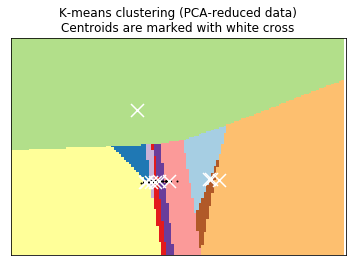

In [72]:
import matplotlib.pyplot as plt
reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init='k-means++', n_clusters=10, n_init=10)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [73]:
labels=kmeans.labels_

In [74]:
itemfreq(labels)

array([[  0,  34],
       [  1, 371],
       [  2,  10],
       [  3,  17],
       [  4,  34],
       [  5,   3],
       [  6,  39],
       [  7,  20],
       [  8, 148],
       [  9,  36]], dtype=int64)